# Titanic Survival Prediction

## Import Necessary Libriaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tabulate import tabulate

In [2]:
DataFrame=pd.read_csv('C:\\Datasets\\titanic.csv')

In [3]:
DataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## copy of DataFrame

In [4]:
df=DataFrame.copy()

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.shape

(418, 12)

# Data Preprocessing

## Identifying null values and outliers

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Figure size 1000x700 with 0 Axes>

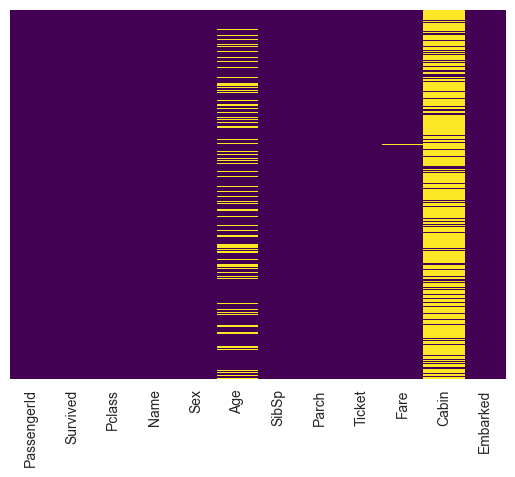

<Figure size 1000x700 with 0 Axes>

In [10]:
sns.set_style('whitegrid')
sns.heatmap(DataFrame.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.figure(figsize=(10,7))

In [11]:
df.drop('Cabin',inplace=True,axis=1)

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<Axes: >

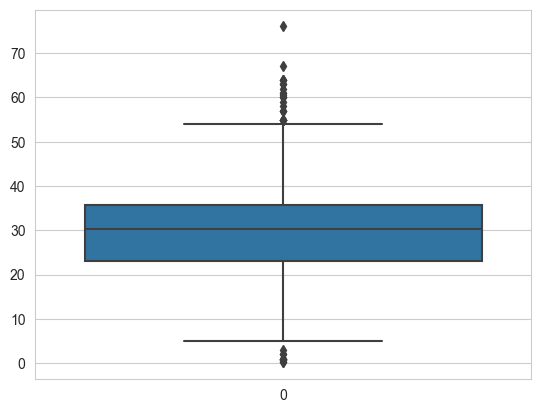

In [13]:
sns.boxplot(df['Age'])

<Axes: >

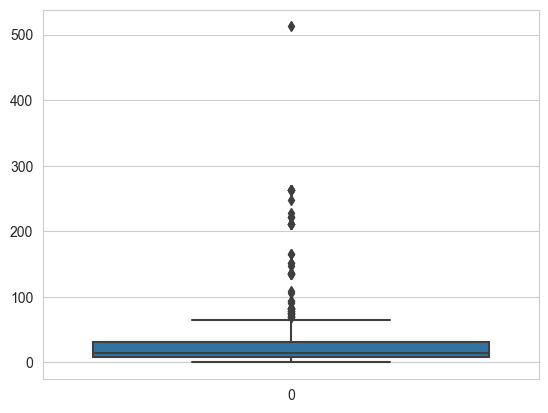

In [14]:
sns.boxplot(df['Fare'])

In [15]:
def Bounds(col):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    IQR=q3-q1
    u_bound=q3+1.5*IQR
    l_bound=q1-1.5*IQR
    print(l_bound,u_bound)
    return l_bound,u_bound

## Capping the outliers

In [16]:
Age_lBound,Age_uBound=Bounds(df['Age'])
def capping(Age_lBound,Age_uBound,feature):
    temp=[]
    for value in feature:
        if value>Age_uBound:
            temp.append(Age_uBound)
        elif value<Age_lBound:
            temp.append(Age_lBound)
        else:
            temp.append(value)
    return temp

3.875 54.875


In [17]:
df['Age']=capping(Age_lBound,Age_uBound,df['Age'])

<Axes: >

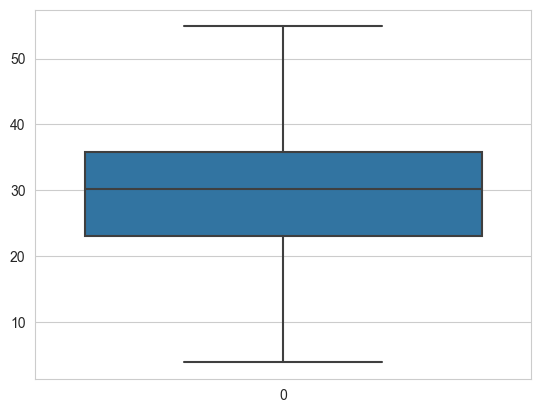

In [18]:
sns.boxplot(df['Age'])

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [20]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

<Axes: >

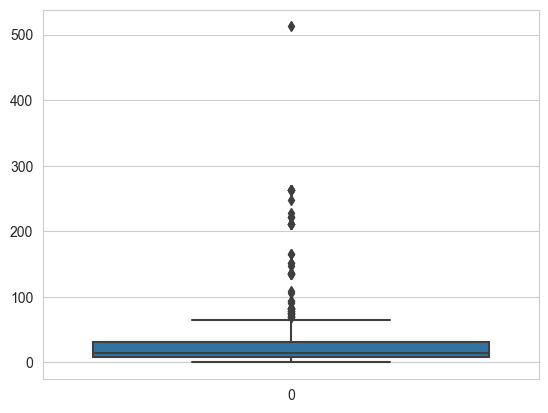

In [21]:
sns.boxplot(df['Fare'])

In [22]:
Fare_lBound,Fare_uBound=Bounds(df['Fare'])
df['Fare']=capping(Fare_lBound,Fare_uBound,df['Fare'])

-27.5105 66.9063


<Axes: >

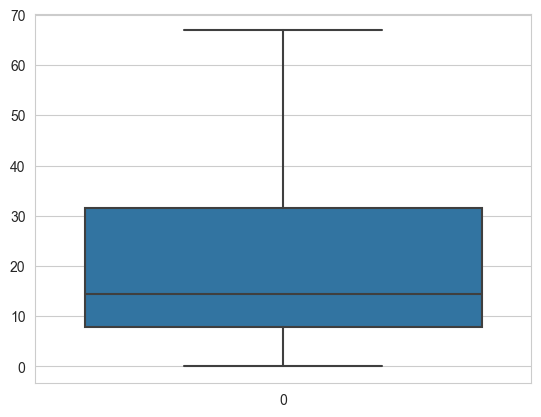

In [23]:
sns.boxplot(df['Fare'])

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,54.875,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.2875,S


In [26]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [27]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,54.87500,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,66.9063,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


## Label Encoding

In [28]:
lableInstance=LabelEncoder()

In [29]:
sex=lableInstance.fit_transform(df['Sex'])

In [30]:
df['Sex']=sex

### 1 represenets the passenger is Male 
###  0 represents the passenger is  Female

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.500,0,0,7.8292,Q
1,1,3,0,47.000,1,0,7.0000,S
2,0,2,1,54.875,0,0,9.6875,Q
3,0,3,1,27.000,0,0,8.6625,S
4,1,3,0,22.000,1,1,12.2875,S


In [32]:
Embarked_encoded=lableInstance.fit_transform(df['Embarked'])

### 0 represents the passenger embarked at Q (Queenstown)
### 1 represents the passenger embarked at S (Southampton)
###  2 represents the passenger embarked at C (Cherbourg)

In [33]:
Embarked_encoded

array([1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2,
       0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2,

In [34]:
df['Embarked']=Embarked_encoded

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.500,0,0,7.8292,1
1,1,3,0,47.000,1,0,7.0000,2
2,0,2,1,54.875,0,0,9.6875,1
3,0,3,1,27.000,0,0,8.6625,2
4,1,3,0,22.000,1,1,12.2875,2


In [36]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,66.9063,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2
417,0,3,1,30.27259,1,1,22.3583,0


In [37]:
## Correlation
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,-1.000000,-0.006551,0.099943,0.159120,0.202697,-0.076281
Pclass,-0.108615,1.000000,0.108615,-0.441413,0.001087,0.018721,-0.746547,0.227983
Sex,-1.000000,0.108615,1.000000,0.006551,-0.099943,-0.159120,-0.202697,0.076281
Age,-0.006551,-0.441413,0.006551,1.000000,-0.092328,-0.046323,0.330804,-0.166484
SibSp,0.099943,0.001087,-0.099943,-0.092328,1.000000,0.306895,0.302179,0.052708
Parch,0.159120,0.018721,-0.159120,-0.046323,0.306895,1.000000,0.314485,0.054577
Fare,0.202697,-0.746547,-0.202697,0.330804,0.302179,0.314485,1.000000,-0.233940
Embarked,-0.076281,0.227983,0.076281,-0.166484,0.052708,0.054577,-0.233940,1.000000


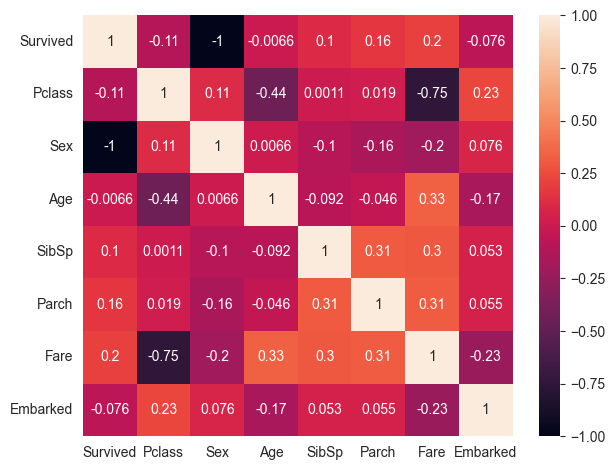

In [38]:
sns.heatmap(df.corr(),annot=True)
# plt.figure(figsize=(12,9))
plt.tight_layout()

In [39]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [40]:
X=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
y=df['Survived']

# Train,Test and Split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=58)

# Model - Logistic Regression

In [42]:
logistic_regression_model=LogisticRegression(max_iter=1000,solver='liblinear')

In [43]:
logistic_regression_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [44]:
coefficients=logistic_regression_model.coef_
print(coefficients)
intercept=logistic_regression_model.intercept_
print(intercept)
type(coefficients)

[[ 0.47564679 -6.28266204  0.01204563 -0.03008133  0.0190587   0.0238906
   0.05988753]]
[0.60371061]


numpy.ndarray

## Prediction Analysis

In [45]:
y_predicted=logistic_regression_model.predict(X_test)

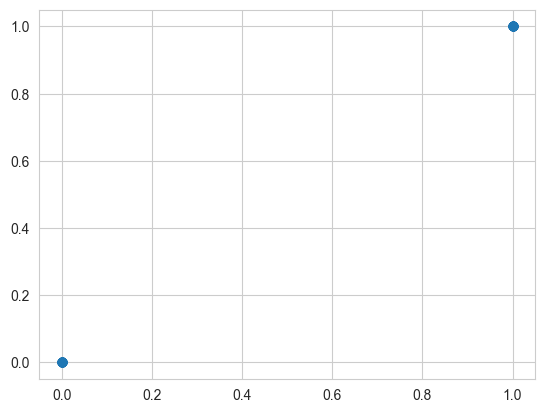

In [46]:
plt.scatter(y_test,y_predicted)

## Accuracy Score

In [47]:
accuracy_score=metrics.accuracy_score(y_test,y_predicted)
print(accuracy_score)
print("Accuracy of the model is ",accuracy_score*100,'%')

1.0
Accuracy of the model is  100.0 %


## Confusion Matrix

In [48]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predicted)
print(confusion_matrix)

[[45  0]
 [ 0 39]]


## F1 Score

In [49]:
f1_score=metrics.f1_score(y_test,y_predicted)
print(f1_score)

1.0


## Recall Score

In [50]:
recall_score=metrics.recall_score(y_test,y_predicted)

In [51]:
print(recall_score)

1.0


## Classification Report

In [52]:
classification_report=metrics.classification_report(y_test,y_predicted)

In [53]:
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        39

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

